# Pymaceuticals Inc.
---

### Analysis


Comparison Across Regimens: By comparing the summary statistics across different drug regimens, we can identify which treatments show more desirable outcomes in terms of tumor volume reduction and consistency of results. Capomulin and Ramicane appear to be the most promising treatments based on these metrics:  
- Mean and Median Tumor Volume: Capomulin and Ramicane have the lowest mean and median tumor volumes among the drug regimens. This suggests that these treatments are more effective in reducing tumor size compared to others.
- Tumor Volume Variance and Standard Deviation: Capomulin and Ramicane exhibit lower variance and standard deviation compared to most other regimens, which that means less variability in tumor volume measurements, which may imply greater consistency and predictability in treatment outcomes. <br>

Others like Ketapril, Naftisol, and Placebo show higher tumor volumes and greater variability.
 

Comparison on Drug Regiment and Timepoints: By comparing the heights of the bars representing each drug regimen, we can visually assess the relative abundance of data points for different treatments. Treatments with taller bars like Capomulin and Ramicane indicated a higher number of timepoints, that suggest more extensive data collection for these regimens.

Gender Distribution: The pie charts showed the distribution of female versus male mice revealed that there is a relatively balanced gender distribution among the study subjects. 

Relationship Between Mouse Weight and Tumor Volume: Considering the cut off value for correlation (< ±0.3 very weak, ±0.3 - ±0.5 very weak, ±0.5 - ±0.7 moderate, > ±0.7 strong) we learned in class, the result on the scatter plot and correlation analysis conducted for the Capomulin regimen suggested a strong positive correlation between mouse weight and average observed tumor volume. This finding showed that mice with higher weights tend to have larger tumor volumes.

 =====================================================================================================================================================================================
 

In [390]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [391]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].nunique()

249

In [392]:
# Our data should be uniquely identified by Mouse ID and Timepoint
Unique_mouse = merged_data[["Mouse ID", "Timepoint"]]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = Unique_mouse[Unique_mouse.duplicated()]["Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [393]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicated = merged_data[merged_data["Mouse ID"].isin(duplicate_mouse)]
all_duplicated

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [394]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop(merged_data[merged_data['Mouse ID'] == 'g989'].index)
cleaned_data .head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [395]:
# Checking the number of mice in the clean DataFrame.
mouse_count = cleaned_data["Mouse ID"].nunique()
mouse_count

248

## Summary Statistics

In [396]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_by_regiment = cleaned_data[["Drug Regimen", "Tumor Volume (mm3)"]]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_tumor_by_regiment = tumor_by_regiment.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = grouped_tumor_by_regiment.mean() 
median_tumor_volume = grouped_tumor_by_regiment.median() 
variance_tumor_volume = grouped_tumor_by_regiment.var() 
std_tumor_volume = grouped_tumor_by_regiment.std() 
std_err_tumor_volume = grouped_tumor_by_regiment.sem() 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_df = pd.DataFrame({"Mean Tumor Volume" : mean_tumor_volume,
                                "Median Tumor Volume" : median_tumor_volume,
                                "Tumor Volume Variance" : variance_tumor_volume,
                                "Tumor Volume std. Dev." : std_tumor_volume,
                                "Tumor Volume Std. Err." : std_err_tumor_volume
                                })
tumor_volume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [397]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

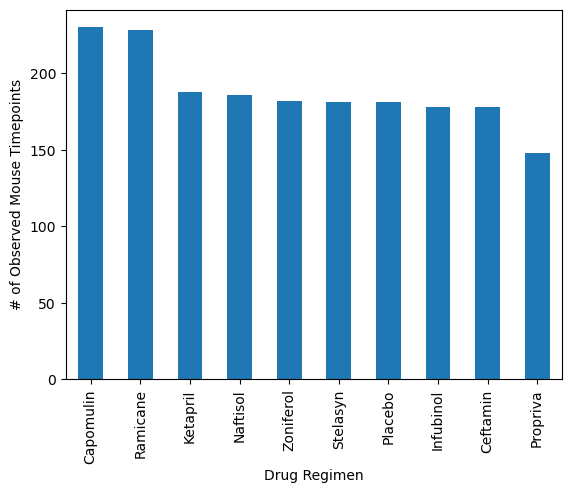

In [398]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the total number of rows of observed timepoints for each drug regimen
timepoints_regimen_bar = cleaned_data["Drug Regimen"].value_counts()

# Sort the values in descending order of timepoints count
timepoints_regimen_sorted = timepoints_regimen_bar.sort_values(ascending=False)

# Plot bar chart using Pandas
timepoints_regimen_bar.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.show()

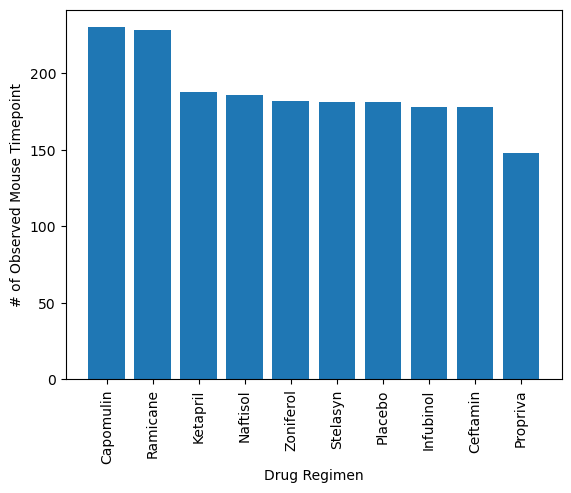

In [399]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the total number of rows of observed timepoints for each drug regimen
drug_regimen_counts = cleaned_data["Drug Regimen"].value_counts()

# Sort the values in descending order of timepoints count
timepoints_regimen_sorted = timepoints_regimen_bar.sort_values(ascending=False)

# Plot bar chart using pyplot
y_axis = drug_regimen_counts.values
x_axis = np.arange(len(drug_regimen_counts))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, drug_regimen_counts.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoint")
plt.xticks(rotation="vertical")
plt.show()

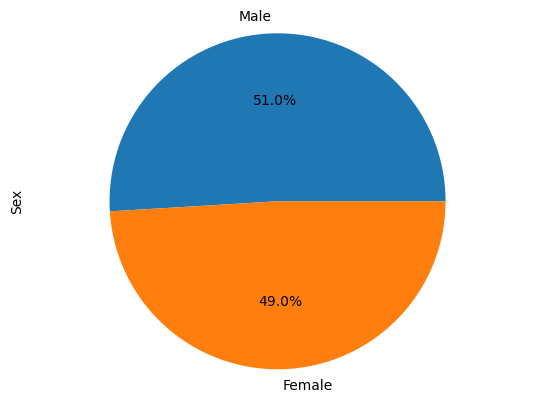

In [400]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


# Count the total number of male and female mice
sex_filtered = cleaned_data["Sex"].value_counts()

# Plot a pie chart using Pandas
sex_filtered.plot(kind = "pie", ylabel="Sex", autopct="%1.0f.0%%")
plt.axis("equal")
plt.show()

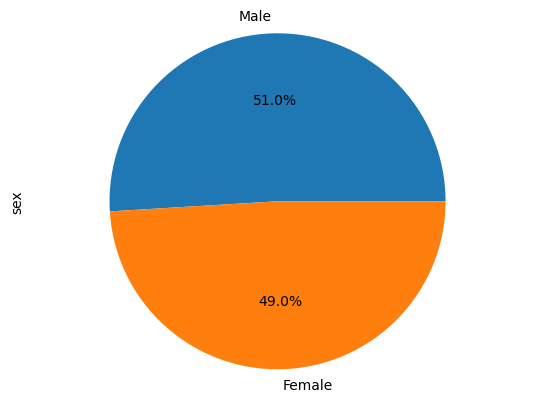

In [401]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Plot a pie chart using pyplot
plt.pie(sex_filtered, labels=sex_filtered.index, autopct="%1.0f.0%%")
plt.ylabel("sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [402]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume_data = cleaned_data.groupby(["Mouse ID"]).agg({"Timepoint": "max", "Tumor Volume (mm3)": "last"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_data = pd.merge(final_tumor_volume_data, cleaned_data, on=["Mouse ID", "Timepoint"], how="inner", suffixes=("", "_last_timepoint"))


In [403]:
# Put treatments into a list for for loop (and later for plot labels)
selected_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in selected_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume_data.loc[final_tumor_volume_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(treatment_data)

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
   

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


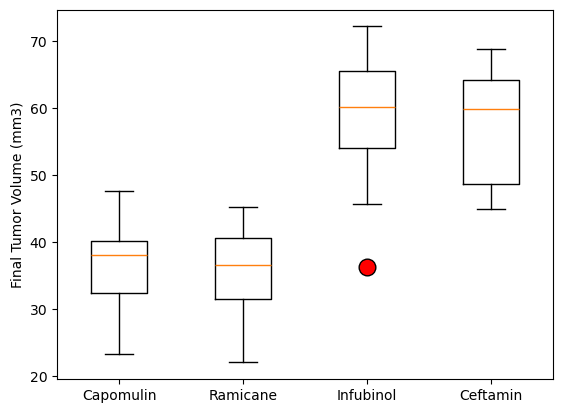

In [404]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Plot a box and whisker plot
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
box = ax1.boxplot(tumor_vol_data, labels=selected_treatments)

# Shape appearance of outliers
for outlier in box["fliers"]:
    outlier.set(marker="o", markersize=12, markerfacecolor="red", markeredgecolor="black")

plt.show()

## Line and Scatter Plots

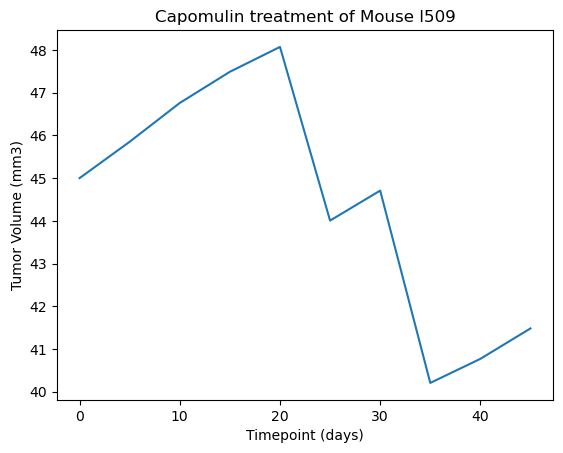

In [405]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter a single mouse treated with Capomulin by Mouse ID (l509)
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
mouse_id = "l509" 
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]

# Plot a line plot
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.title(f"Capomulin treatment of Mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

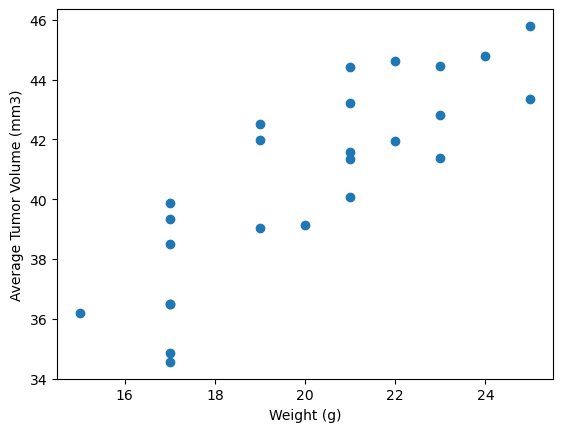

In [406]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_average_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()
x_values = mouse_weights
y_values = capomulin_average_volume

# Plot a scatter plot
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


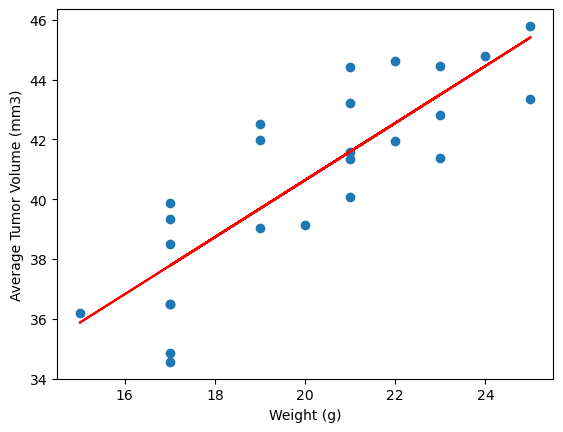

In [407]:
# Calculate the correlation coefficient and a linear regression model 
x_values = mouse_weights
y_values = capomulin_average_volume
# Correlation coefficient
correlation = st.pearsonr(x_values, y_values)[0]
print("The correlation between mouse weight and the average tumor volume is", round((correlation),2))

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept

# Plot a scatter plot
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(x_values, regress_values, "r")
plt.show()